In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
data = np.loadtxt("process_tomography_20230206.txt")

In [3]:
data

array([[0.00000000e+00, 1.54500000e+03, 1.67570412e+09, ...,
        5.00089754e-06, 1.85625913e-06, 1.24322169e-05],
       [0.00000000e+00, 1.54500000e+03, 1.67570412e+09, ...,
        5.38887616e-06, 1.86232955e-06, 1.20072582e-05],
       [0.00000000e+00, 1.54500000e+03, 1.67570412e+09, ...,
        4.57922533e-06, 1.86889224e-06, 1.21575822e-05],
       ...,
       [0.00000000e+00, 1.54600000e+03, 1.67572224e+09, ...,
        2.78663674e-06, 3.32798277e-06, 1.02848198e-05],
       [0.00000000e+00, 1.54600000e+03, 1.67572224e+09, ...,
        3.25452697e-06, 3.33780736e-06, 1.07536880e-05],
       [0.00000000e+00, 1.54600000e+03, 1.67572224e+09, ...,
        2.80015320e-06, 3.38840528e-06, 1.03107886e-05]])

In [4]:
time_h_1549 = []
time_h_1549_2 = []
time_h_1549_4 = []
time_h_1549_6 = []
time_h_1549_8 = []
time_h_1550 = []
time_d_1549 = []
time_d_1549_2 = []
time_d_1549_4 = []
time_d_1549_6 = []
time_d_1549_8 = []
time_d_1550 = []

In [5]:
vh_h_1549 = []
vh_h_1549_2 = []
vh_h_1549_4 = []
vh_h_1549_6 = []
vh_h_1549_8 = []
vh_h_1550 = []
vh_d_1549 = []
vh_d_1549_2 = []
vh_d_1549_4 = []
vh_d_1549_6 = []
vh_d_1549_8 = []
vh_d_1550 = []

In [6]:
da_h_1549 = []
da_h_1549_2 = []
da_h_1549_4 = []
da_h_1549_6 = []
da_h_1549_8 = []
da_h_1550 = []
da_d_1549 = []
da_d_1549_2 = []
da_d_1549_4 = []
da_d_1549_6 = []
da_d_1549_8 = []
da_d_1550 = []

In [7]:
pd_h_1549 = []
pd_h_1549_2 = []
pd_h_1549_4 = []
pd_h_1549_6 = []
pd_h_1549_8 = []
pd_h_1550 = []
pd_d_1549 = []
pd_d_1549_2 = []
pd_d_1549_4 = []
pd_d_1549_6 = []
pd_d_1549_8 = []
pd_d_1550 = []

In [8]:
pa_h_1549 = []
pa_h_1549_2 = []
pa_h_1549_4 = []
pa_h_1549_6 = []
pa_h_1549_8 = []
pa_h_1550 = []
pa_d_1549 = []
pa_d_1549_2 = []
pa_d_1549_4 = []
pa_d_1549_6 = []
pa_d_1549_8 = []
pa_d_1550 = []

In [9]:
def extract_data(lh,ld,lt,la,ldp,d):
    vh = d[4]/(1.1*d[3]/1.03)
    pd = d[5]/(d[6]+d[5])
    pa = d[6]/(d[6]+d[5])
    lt.append(datetime.datetime.fromtimestamp(d[2]))
    lh.append(vh)
    ld.append((pd-pa)/(np.sin(2*np.arctan(vh))))
    ldp.append(pd)
    la.append(pa)

In [10]:
for i,d in enumerate(data):
    if d[0] == 0:
        if d[1] == 1545:
            extract_data(vh_h_1549,da_h_1549,time_h_1549,pa_h_1549,pd_h_1549,d)
        if d[1] == 1546:
            extract_data(vh_h_1549_2,da_h_1549_2,time_h_1549_2,pa_h_1549_2,pd_h_1549_2,d)
        if d[1] == 1547:
            extract_data(vh_h_1549_4,da_h_1549_4,time_h_1549_4,pa_h_1549_4,pd_h_1549_4,d)
        if d[1] == 1548:
            extract_data(vh_h_1549_6,da_h_1549_6,time_h_1549_6,pa_h_1549_6,pd_h_1549_6,d)
        if d[1] == 1549:
            extract_data(vh_h_1549_8,da_h_1549_8,time_h_1549_8,pa_h_1549_8,pd_h_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_h_1550,da_h_1550,time_h_1550,pa_h_1550,pd_h_1550,d)
    if d[0] == 1:
        if d[1] == 1545:
            extract_data(vh_d_1549,da_d_1549,time_d_1549,pa_d_1549,pd_d_1549,d)
        if d[1] == 1546:
            extract_data(vh_d_1549_2,da_d_1549_2,time_d_1549_2,pa_d_1549_2,pd_d_1549_2,d)
        if d[1] == 1547:
            extract_data(vh_d_1549_4,da_d_1549_4,time_d_1549_4,pa_d_1549_4,pd_d_1549_4,d)
        if d[1] == 1548:
            extract_data(vh_d_1549_6,da_d_1549_6,time_d_1549_6,pa_d_1549_6,pd_d_1549_6,d)
        if d[1] == 1549:
            extract_data(vh_d_1549_8,da_d_1549_8,time_d_1549_8,pa_d_1549_8,pd_d_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_d_1550,da_d_1550,time_d_1550,pa_d_1550,pd_d_1550,d)

In [46]:
avg_vh_h_1549 = np.mean(np.array(vh_h_1549)[:-1].reshape(-1, 16), axis=1)
avg_vh_h_1549_2 = np.mean(np.array(vh_h_1549_2[:-6]).reshape(-1, 16), axis=1)
avg_vh_h_1549_4 = np.mean(np.array(vh_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_vh_h_1549_6 = np.mean(np.array(vh_h_1549_6[:-15]).reshape(-1, 16), axis=1)
avg_vh_h_1549_8 = np.mean(np.array(vh_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_vh_h_1550 = np.mean(np.array(vh_h_1550[:-3]).reshape(-1, 16), axis=1)
avg_vh_d_1549 = np.mean(np.array(vh_d_1549).reshape(-1, 16), axis=1)
avg_vh_d_1549_2 = np.mean(np.array(vh_d_1549_2).reshape(-1, 16), axis=1)
avg_vh_d_1549_4 = np.mean(np.array(vh_d_1549_4)[:-12].reshape(-1, 16), axis=1)
avg_vh_d_1549_6 = np.mean(np.array(vh_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_vh_d_1549_8 = np.mean(np.array(vh_d_1549_8[:-11]).reshape(-1, 16), axis=1)
avg_vh_d_1550 = np.mean(np.array(vh_d_1550).reshape(-1, 16), axis=1)

In [47]:
avg_da_h_1549 = np.mean(np.array(da_h_1549)[:-1].reshape(-1, 16), axis=1)
avg_da_h_1549_2 = np.mean(np.array(da_h_1549_2[:-6]).reshape(-1, 16), axis=1)
avg_da_h_1549_4 = np.mean(np.array(da_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_da_h_1549_6 = np.mean(np.array(da_h_1549_6[:-15]).reshape(-1, 16), axis=1)
avg_da_h_1549_8 = np.mean(np.array(da_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_da_h_1550 = np.mean(np.array(da_h_1550[:-3]).reshape(-1, 16), axis=1)
avg_da_d_1549 = np.mean(np.array(da_d_1549).reshape(-1, 16), axis=1)
avg_da_d_1549_2 = np.mean(np.array(da_d_1549_2).reshape(-1, 16), axis=1)
avg_da_d_1549_4 = np.mean(np.array(da_d_1549_4)[:-12].reshape(-1, 16), axis=1)
avg_da_d_1549_6 = np.mean(np.array(da_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_da_d_1549_8 = np.mean(np.array(da_d_1549_8[:-11]).reshape(-1, 16), axis=1)
avg_da_d_1550 = np.mean(np.array(da_d_1550).reshape(-1, 16), axis=1)

In [48]:
avg_pa_h_1549 = np.mean(np.array(pa_h_1549)[:-1].reshape(-1, 16), axis=1)
avg_pa_h_1549_2 = np.mean(np.array(pa_h_1549_2[:-6]).reshape(-1, 16), axis=1)
avg_pa_h_1549_4 = np.mean(np.array(pa_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_pa_h_1549_6 = np.mean(np.array(pa_h_1549_6[:-15]).reshape(-1, 16), axis=1)
avg_pa_h_1549_8 = np.mean(np.array(pa_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_pa_h_1550 = np.mean(np.array(pa_h_1550[:-3]).reshape(-1, 16), axis=1)
avg_pa_d_1549 = np.mean(np.array(pa_d_1549).reshape(-1, 16), axis=1)
avg_pa_d_1549_2 = np.mean(np.array(pa_d_1549_2).reshape(-1, 16), axis=1)
avg_pa_d_1549_4 = np.mean(np.array(pa_d_1549_4)[:-12].reshape(-1, 16), axis=1)
avg_pa_d_1549_6 = np.mean(np.array(pa_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_pa_d_1549_8 = np.mean(np.array(pa_d_1549_8[:-11]).reshape(-1, 16), axis=1)
avg_pa_d_1550 = np.mean(np.array(pa_d_1550).reshape(-1, 16), axis=1)

In [49]:
avg_pd_h_1549 = np.mean(np.array(pd_h_1549)[:-1].reshape(-1, 16), axis=1)
avg_pd_h_1549_2 = np.mean(np.array(pd_h_1549_2[:-6]).reshape(-1, 16), axis=1)
avg_pd_h_1549_4 = np.mean(np.array(pd_h_1549_4[:-15]).reshape(-1, 16), axis=1)
avg_pd_h_1549_6 = np.mean(np.array(pd_h_1549_6[:-15]).reshape(-1, 16), axis=1)
avg_pd_h_1549_8 = np.mean(np.array(pd_h_1549_8[:-1]).reshape(-1, 16), axis=1)
avg_pd_h_1550 = np.mean(np.array(pd_h_1550[:-3]).reshape(-1, 16), axis=1)
avg_pd_d_1549 = np.mean(np.array(pd_d_1549).reshape(-1, 16), axis=1)
avg_pd_d_1549_2 = np.mean(np.array(pd_d_1549_2).reshape(-1, 16), axis=1)
avg_pd_d_1549_4 = np.mean(np.array(pd_d_1549_4)[:-12].reshape(-1, 16), axis=1)
avg_pd_d_1549_6 = np.mean(np.array(pd_d_1549_6[:-14]).reshape(-1, 16), axis=1)
avg_pd_d_1549_8 = np.mean(np.array(pd_d_1549_8[:-11]).reshape(-1, 16), axis=1)
avg_pd_d_1550 = np.mean(np.array(pd_d_1550).reshape(-1, 16), axis=1)

In [54]:
theta_h_1549 = []
theta_h_1549_2 = []
theta_h_1549_4 = []
theta_h_1549_6 = []
theta_h_1549_8 = []
theta_h_1550 = []
theta_d_1549 = []
theta_d_1549_2 = []
theta_d_1549_4 = []
theta_d_1549_6 = []
theta_d_1549_8 = []
theta_d_1550 = []

In [55]:
phi_h_1549 = []
phi_h_1549_2 = []
phi_h_1549_4 = []
phi_h_1549_6 = []
phi_h_1549_8 = []
phi_h_1550 = []
phi_d_1549 = []
phi_d_1549_2 = []
phi_d_1549_4 = []
phi_d_1549_6 = []
phi_d_1549_8 = []
phi_d_1550 = []

In [56]:
def fmle(params,*args):
        phh,phv,phd,pha,pvh,pvv,pvd,pva,pdh,pdv,pdd,pda,pah,pav,pad,paa=args
        th,tv = params
        return -(np.log(th**2)*phh
                +np.log(1/2*(th**2))*phd
                 +np.log(1/2*(th**2))*pha
                 +np.log(tv**2)*pvv
                +np.log(1/2*(tv**2))*pvd
                 +np.log(1/2*(tv**2))*pva
                +np.log((1-th**2)*1/2)*pdh
                 +np.log((1-tv**2)*1/2)*pdv
                +np.log(1/2*((1-th**2)*1/2+(1-tv**2)*1/2+np.sqrt((1-th**2)*(1-tv**2))))*pdd
                +np.log((1-th**2)*1/2)*pah
                 +np.log((1-tv**2)*1/2)*pav
                 +np.log(1/2*((1-th**2)*1/2+(1-tv**2)*1/2+np.sqrt((1-th**2)*(1-tv**2))))*paa)
x0=[0.5,0.5]
bounds=((0.1,0.9),(0.1,0.9))
#x0=[1,1,1,1,1,1,1,1,0.5,0.5,0.5,0.5]
phh=0.4838333413
phv=0.002787419922
phd=0.2798005061
pha=0.2335787327
pvh=0.00159493577
pvv=0.5093903389
pvd=0.2292256525
pva=0.2597890728
pdh=0.2579783653
pdv=0.2311593878
pdd=0.4680977602
pda=0.04276448674
pah=0.2572440401
pav=0.3354050634
pad=0.03203814785
paa=0.4614669003
result = minimize(fmle, x0,bounds=((0.1,0.9),(0.1,0.9)),args=(phh,phv,phd,pha,pvh,pvv,pvd,pva,pdh,pdv,pdd,pda,pah,pav,pad,paa))
th=result.x[0]
tv=result.x[1]
print(th**2)
print(tv**2)
def fmlenew(params,*args):
        ph,pv,pd,pa=args
        theta,phi = params
        qh=th**2*np.cos(theta)**2
        qv=tv**2*np.sin(theta)**2
        qd=1/2*((1-th**2)*np.cos(theta)**2+(1-tv**2)*np.sin(theta)**2+np.sqrt((1-th**2)*(1-tv**2))*np.sin(2*theta)*np.cos(phi))
        qa=1/2*((1-th**2)*np.cos(theta)**2+(1-tv**2)*np.sin(theta)**2-np.sqrt((1-th**2)*(1-tv**2))*np.sin(2*theta)*np.cos(phi))
        return -(qh/(qh+qv))**ph*(qv/(qh+qv))**pv*(qd/(qa+qd))**pd*(qa/(qa+qd))**pa

0.5051849514013093
0.4910963841013481


In [57]:
for i in range(len(avg_vh_h_1549)):
    x0=[1,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549[i]+1),1-1/(avg_vh_h_1549[i]+1),avg_pd_h_1549[i],avg_pa_h_1549[i]),bounds=[(0,2*np.pi),(-2*np.pi,1.2*np.pi)])
    theta_h_1549.append(result.x[0]*(180/(np.pi)))
    phi_h_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_2)):
    x0=[1,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_2[i]+1),1-1/(avg_vh_h_1549_2[i]+1),avg_pd_h_1549_2[i],avg_pa_h_1549_2[i]),bounds=[(0,2*np.pi),(-2*np.pi,1.2*np.pi)])
    theta_h_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_4)):
    x0=[1,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_4[i]+1),1-1/(avg_vh_h_1549_4[i]+1),avg_pd_h_1549_4[i],avg_pa_h_1549_4[i]),bounds=[(0,2*np.pi),(-2*np.pi,1.2*np.pi)])
    theta_h_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_6)):
    x0=[1,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_6[i]+1),1-1/(avg_vh_h_1549_6[i]+1),avg_pd_h_1549_6[i],avg_pa_h_1549_6[i]),bounds=[(0,2*np.pi),(-2*np.pi,1.2*np.pi)])
    theta_h_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_8)):
    x0=[1,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_8[i]+1),1-1/(avg_vh_h_1549_8[i]+1),avg_pd_h_1549_8[i],avg_pa_h_1549_8[i]),bounds=[(0,2*np.pi),(-2*np.pi,1.2*np.pi)])
    theta_h_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1550)):
    x0=[1,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1550[i]+1),1-1/(avg_vh_h_1550[i]+1),avg_pd_h_1550[i],avg_pa_h_1550[i]),bounds=[(0,2*np.pi),(-2*np.pi,1.2*np.pi)])
    theta_h_1550.append(result.x[0]*(180/(np.pi)))
    phi_h_1550.append(result.x[1]*(180/(np.pi)))

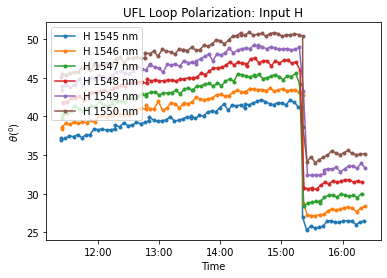

In [62]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points],theta_h_1549[:-1],label='H 1545 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points],theta_h_1549_2,label='H 1546 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],theta_h_1549_4,label='H 1547 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],theta_h_1549_6,label='H 1548 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points],theta_h_1549_8,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points],theta_h_1550[:-1],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("UFL Loop Polarization: Input H")
plt.legend(loc='upper left')
#plt.savefig('vh_theta_drift_rantoul_20230109.pdf')

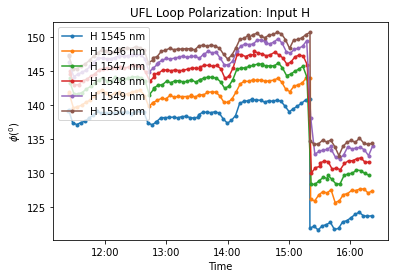

In [64]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points],phi_h_1549[:-1],label='H 1545 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points],phi_h_1549_2,label='H 1546 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],phi_h_1549_4,label='H 1547 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],phi_h_1549_6,label='H 1548 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points],phi_h_1549_8,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points],phi_h_1550[:-1],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
#plt.ylim((145,155))
plt.xlabel("Time")
plt.title("UFL Loop Polarization: Input H")
plt.legend(loc='upper left')
#plt.savefig('vh_phi_drift_rantoul_20230109.pdf')

In [65]:
for i in range(len(avg_vh_d_1549)):
    x0=[np.pi,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549[i]+1),1-1/(avg_vh_d_1549[i]+1),avg_pd_d_1549[i],avg_pa_d_1549[i]),bounds=[(0,2*np.pi),(0,1.5*np.pi)])
    theta_d_1549.append(result.x[0]*(180/(np.pi)))
    phi_d_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_2)):
    x0=[np.pi,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_2[i]+1),1-1/(avg_vh_d_1549_2[i]+1),avg_pd_d_1549_2[i],avg_pa_d_1549_2[i]),bounds=[(0,2*np.pi),(0,1.5*np.pi)])
    theta_d_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_4)):
    x0=[np.pi,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_4[i]+1),1-1/(avg_vh_d_1549_4[i]+1),avg_pd_d_1549_4[i],avg_pa_d_1549_4[i]),bounds=[(0,2*np.pi),(0,1.5*np.pi)])
    theta_d_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_6)):
    x0=[np.pi,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_6[i]+1),1-1/(avg_vh_d_1549_6[i]+1),avg_pd_d_1549_6[i],avg_pa_d_1549_6[i]),bounds=[(0,2*np.pi),(0,1.5*np.pi)])
    theta_d_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_8)):
    x0=[np.pi,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_8[i]+1),1-1/(avg_vh_d_1549_8[i]+1),avg_pd_d_1549_8[i],avg_pa_d_1549_8[i]),bounds=[(0,2*np.pi),(0,1.5*np.pi)])
    theta_d_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1550)):
    x0=[np.pi,0.5*np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1550[i]+1),1-1/(avg_vh_d_1550[i]+1),avg_pd_d_1550[i],avg_pa_d_1550[i]),bounds=[(0,2*np.pi),(0,1.5*np.pi)])
    theta_d_1550.append(result.x[0]*(180/(np.pi)))
    phi_d_1550.append(result.x[1]*(180/(np.pi)))

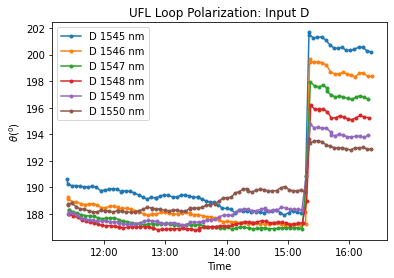

In [70]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points],theta_d_1549,label='D 1545 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points],theta_d_1549_2,label='D 1546 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],theta_d_1549_4,label='D 1547 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],theta_d_1549_6,label='D 1548 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],theta_d_1549_8,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points],theta_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
#plt.ylim((180,240))
plt.title("UFL Loop Polarization: Input D")
plt.legend(loc='upper left')
#plt.savefig('da_theta_drift_rantoul_20230109.pdf')

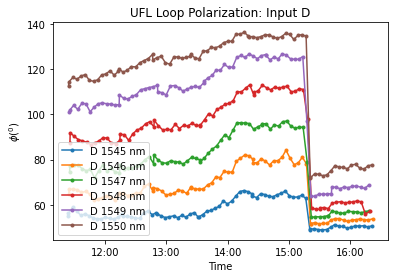

In [71]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points],phi_d_1549,label='D 1545 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points],phi_d_1549_2,label='D 1546 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],phi_d_1549_4,label='D 1547 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],phi_d_1549_6,label='D 1548 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],phi_d_1549_8,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points],phi_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
#plt.ylim((179.5,180.5))
plt.xlabel("Time")
plt.title("UFL Loop Polarization: Input D")
plt.legend(loc='lower left')
#plt.savefig('da_phi_drift_rantoul_20230109.pdf')